三角函数，考虑一下向量v1= [1, 2, 3]，v1和向量 v2=0.5×v1 之间的角度将会是0，参见下面的代码片段：

In [1]:
import numpy as np

In [2]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

### 加载鸢尾花数据集
通过在线资源加载：

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml'
                 '/machine-learning-databases/iris/iris.data',
                 header=None, encoding='utf-8')

In [5]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


从本地直接加载：

In [6]:
df = pd.read_csv('iris.data',
                 header=None, encoding='utf-8')

In [7]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


从鸢尾花数据集中取出100个训练样本中提取特征的第一列（萼片长度）和第三列（花瓣长度），并将它们存入特征矩阵X，然后经过可视化处理形成二维散点图：

In [8]:
import matplotlib.pyplot as plt

In [9]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [10]:
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

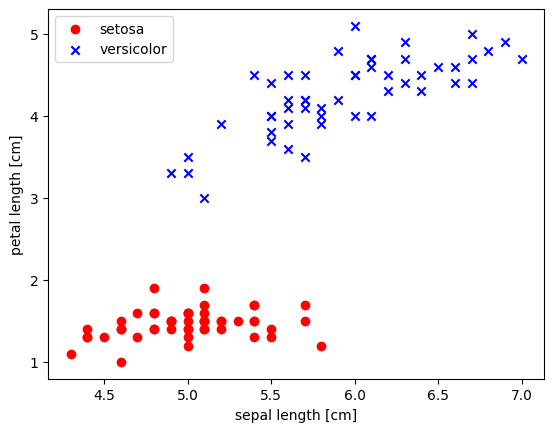

In [11]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

用python实现感知分类器：

In [12]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of
          examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.erros_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.erros_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) > 0.0, 1, -1)

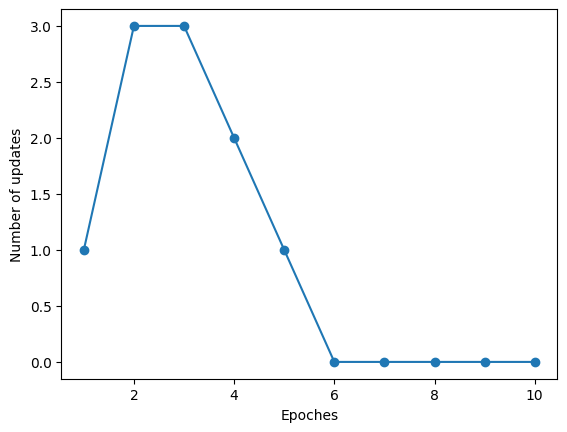

In [13]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.erros_) + 1), ppn.erros_, marker='o')
plt.xlabel('Epoches')
plt.ylabel('Number of updates')
plt.show()

正如上图显示的那样，感知器在第六次迭代后开始收敛，现在我们应该能够完美地对训练样本进行分类了。下面通过实现一个短小精干的函数来完成二维数据集决策边界的可视化：

In [14]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

首先，我们通过ListedColormap根据颜色列表来定义一些颜色和标记并创建色度图。然后，确定两个特征的最小值和最大值，通过调用NumPy的meshgrid函数，利用特征向量来创建网格数组对xx1和xx2。因为是在两个特征维度上训练感知器分类器，所以我们需要对网格数组进行扁平化，以创建一个与鸢尾花训练数据子集相同列数的矩阵，这样就可以调用predict方法来预测相应网格点的分类标签z。

在把预测获得的分类标签z改造成与xx1和xx2相同维数的网格后，现在可以通过调用Matplotlib的contourf函数画出轮廓图，把网格数组中的每个预测分类结果标注在不同颜色的决策区域。执行下面的代码后，我们可以看到对应的决策区域：

C:\Users\LangLang\AppData\Local\Temp\ipykernel_18288\1841755284.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


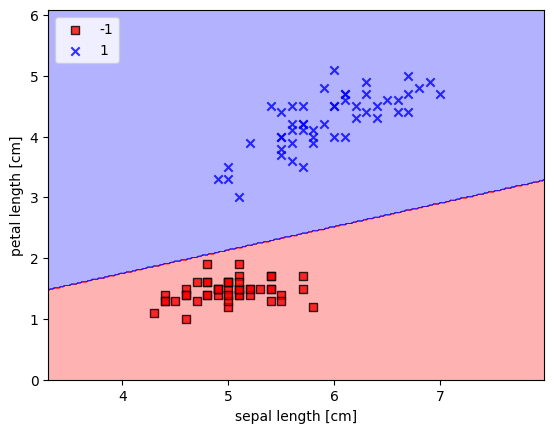

In [15]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()